In [1]:
# write analog input onto DSC110 toptica scan
import sys
sys.path.append("..")
import nidaqmx
import numpy as np
import time
from LowLevelModules.bristol_wavelength_meter_client import *
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

scan_terminal = '/Dev1/ao2'
offset_voltage = 0

# scan the FSM until the desired position
task_toptica = nidaqmx.Task("Toptica scan")
output_volt = task_toptica.ao_channels.add_ao_voltage_chan(scan_terminal, 'Piezo scan', min_val=-5, max_val=5)
task_toptica.write(offset_voltage, auto_start=True, timeout=5)



1

In [2]:
from LowLevelModules.GeneralFunctions import *

In [3]:
bristol521handle=CLOpenUSBSerialDevice(7)

In [4]:

currentLambda = CLGetLambdaReading(bristol521handle)
print(currentLambda)
currentPower = CLGetPowerReading(bristol521handle)
print(currentPower)


731.2679757372541
0.3047619163990021


In [5]:
task_toptica.write(-2, auto_start=True, timeout=5)

1

In [10]:
currentLambda = CLGetLambdaReading(bristol521handle)
print(currentLambda)

731.3786243551559


<IPython.core.display.Javascript object>


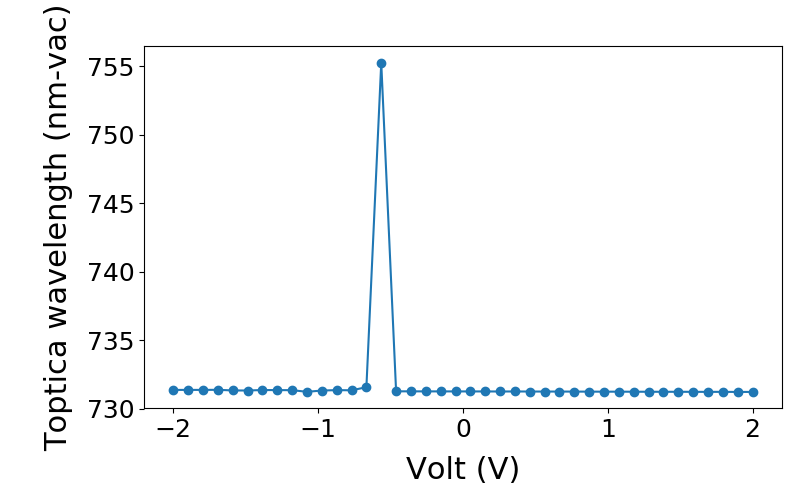

In [11]:
voltage = np.linspace(-2,2,40)
lambdalist=[]
volt_so_far=[]
lp = LivePlot(1, 1, 8, 5, 'o', 'Volt (V)', 'Toptica wavelength (nm-vac)')
for v in voltage:
    task_toptica.write(v, auto_start=True, timeout=5)
    currentLambda = CLGetLambdaReading(bristol521handle)
    lambdalist.append(currentLambda)
    volt_so_far.append(v)
    
    lp.plot_live(volt_so_far, lambdalist)
    time.sleep(.5)

In [12]:
lambdalist

[731.3787793743045,
 731.3796136174507,
 731.3794323563388,
 731.386690456816,
 731.3398443151076,
 731.3357968488637,
 731.3700359237897,
 731.36442432817,
 731.3593322577605,
 731.2409103191101,
 731.3329748136717,
 731.3635319170912,
 731.3504601332163,
 731.5754232212478,
 755.2734970188262,
 731.2765253466704,
 731.2745446222657,
 731.2716862029514,
 731.270965872648,
 731.2695295222918,
 731.2679413389557,
 731.2679642521599,
 731.262865319253,
 731.2657918729584,
 731.261524333727,
 731.2595139697584,
 731.2587932186373,
 731.2558616883965,
 731.2531063939648,
 731.2496793144408,
 731.2504937351827,
 731.246083881502,
 731.244582843682,
 731.2411497706399,
 731.2421187430402,
 731.2382802086925,
 731.2361337001854,
 731.2370920310452,
 731.2314915998954,
 731.2317016978359]

In [3]:
task_toptica.write(0)
task_toptica.close()

DaqError: Task specified is invalid or does not exist.
Status Code: -200088

In [8]:
task_toptica.close()